# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train_news.csv')
df

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...,...,...
20795,20795,5671,NaN,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1
20796,20796,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,20797,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20798,20798,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0


In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.tail()

,id,headline,written_by,news,label
20795,5671,NaN,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1
20796,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20798,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0
20799,15660,Emory University to Pay for ’100 Percent’ of U...,Tom Ciccotta,"Emory University in Atlanta, Georgia, has anno...",0


# Data Structure & Data Analysis

In [4]:
df.shape

(20800, 5)

In [5]:
df.dtypes

id             int64
headline      object
written_by    object
news          object
label          int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          20800 non-null  int64 
 1   headline    20242 non-null  object
 2   written_by  18843 non-null  object
 3   news        20761 non-null  object
 4   label       20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [7]:
# Missing Values
df.isna().sum()

id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

In [8]:
df.shape

(20800, 5)

In [9]:
# Duplicated Entries
df.duplicated().sum()

0

In [10]:
df['headline'].head()

0    Ethics Questions Dogged Agriculture Nominee as...
1    U.S. Must Dig Deep to Stop Argentina’s Lionel ...
2    Cotton to House: ’Do Not Walk the Plank and Vo...
3    Paul LePage, Besieged Maine Governor, Sends Co...
4                         A Digital 9/11 If Trump Wins
Name: headline, dtype: object

In [11]:
df['written_by'].value_counts()

Pam Key                243
admin                  193
Jerome Hudson          166
Charlie Spiering       141
John Hayward           140
                      ... 
Richard B. Woodward      1
carmody.j                1
BS1986                   1
donaldbreaux             1
Zzz                      1
Name: written_by, Length: 4201, dtype: int64

In [12]:
df['news'][1]

'HOUSTON  —   Venezuela had a plan. It was a tactical approach, designed specifically to take Lionel Messi and the other dangerous Argentine attackers out of the game by applying forward pressure and forcing Argentina to make long, hopeful passes. And it worked for about seven minutes. But in the eighth minute, Messi conjured the kind of technical genius that compels most observers to call him the best soccer player in the world, artfully lifting a perfect pass about 15 yards in to Gonzalo Higuaín. With one striking touch, Higuaín converted it into a goal, the first in Argentina’s   victory on Saturday in a Copa América Centenario quarterfinal. In that decisive moment, like so many others experienced by opponents hoping to stop Messi, all of Venezuela’s carefully conceived defensive tactics were laid to waste. “They have that stroke of genius that changes all your schemes,” Venezuela Coach Rafael Dudamel said. “They had an incredible pass from Messi, and they scored. ” Messi has freque

In [13]:
df['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [14]:

# Shuffle data to prevent bias
from sklearn.utils import shuffle
data = shuffle(df)
data = df.reset_index(drop=True)

In [15]:
data.head(10)

,id,headline,written_by,news,label
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
5,3196,Whatever the Outcome on November 8th the US Wi...,NaN,Taming the corporate media beast Whatever the ...,1
6,5134,Rapid Evolution Saved This Fish From Pollution...,JoAnna Klein,The State of New Jersey says you can’t eat the...,0
7,1504,Alabama Prison Officials Retaliate Against Pri...,Brian Sonenstein,Advocates say prison officials at the Kilby Co...,1
8,13559,NaN,steventexas,People have made up their minds on president.\...,1
9,4203,Can We Live in a Constant State of Love?,Gillian,Leave a reply \nToni Emerson – When we fall in...,1


In [16]:
# Remove Id ( we will only use text)
data.drop(["id"],axis=1,inplace=True)

In [17]:
# Remove written_by (since, it is name's of the author)
data.drop(["written_by"],axis=1,inplace=True)

In [18]:
data.drop(["headline"],axis=1,inplace=True)

In [19]:
data.dropna(how='any',axis=0,inplace=True)
data.head()

,news,label
0,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,HOUSTON — Venezuela had a plan. It was a ta...,0
2,"Sunday on ABC’s “This Week,” while discussing ...",0
3,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,Finian Cunningham has written extensively on...,1


In [20]:
data.isna().sum()

news     0
label    0
dtype: int64

In [21]:

# Convert to lower_case
data['news'] = data['news'].apply(lambda x: x.lower())

In [22]:
# Remove punctuation
import string
def punctuation_removal(news):
    all_list = [char for char in news if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str
data['news'] = data['news'].apply(punctuation_removal)

In [23]:
# Remove Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['news'] = data['news'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Applying EDA

label
0    10387
1    10374
Name: news, dtype: int64


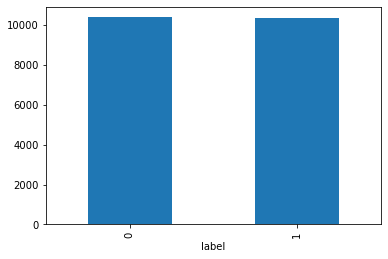

In [24]:
# Number of fake & real articles(where 0:not-fake,1:fake)
print(data.groupby(['label'])['news'].count())
data.groupby(['label'])['news'].count().plot(kind='bar')
plt.show()

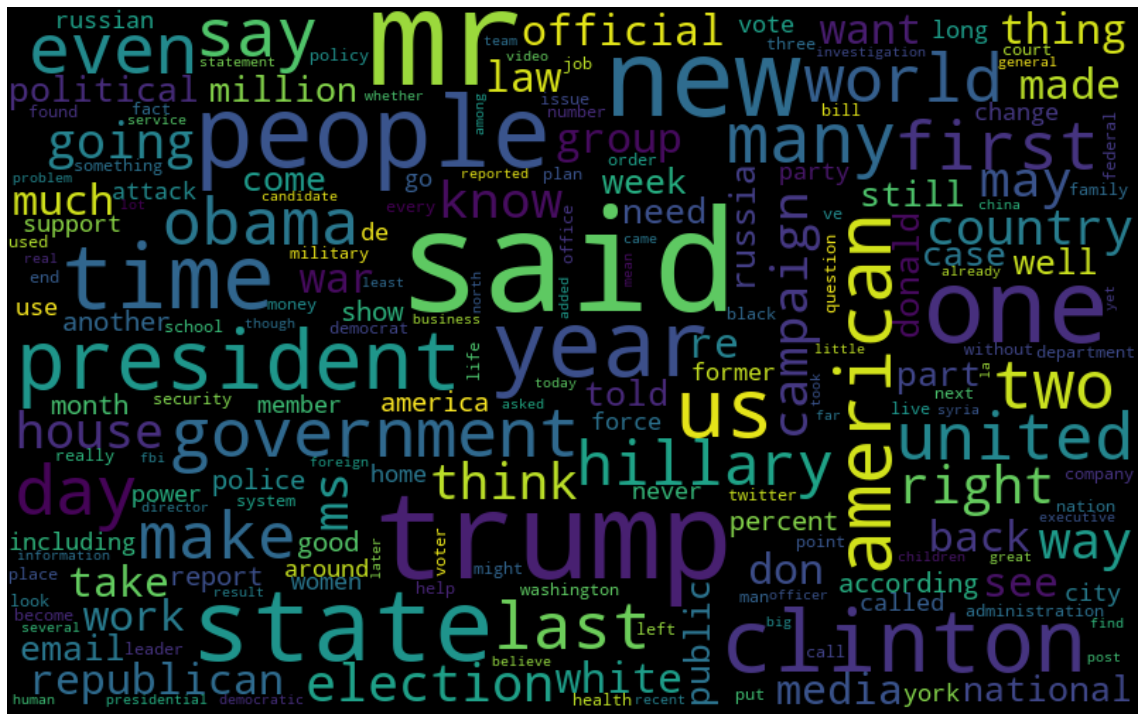

In [25]:
# word cloud on news article
from wordcloud import WordCloud
real_data = data['news']
all_words = ' '.join([text for text in real_data])
wordcloud = WordCloud(width= 800, height= 500, max_font_size = 100,
 collocations = False).generate(all_words)
plt.figure(figsize=(25,13))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
from nltk import tokenize
token_space = tokenize.WhitespaceTokenizer()
def counter(news, quantity):
    all_words = ' '.join([text for text in data['news']])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(18,7))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

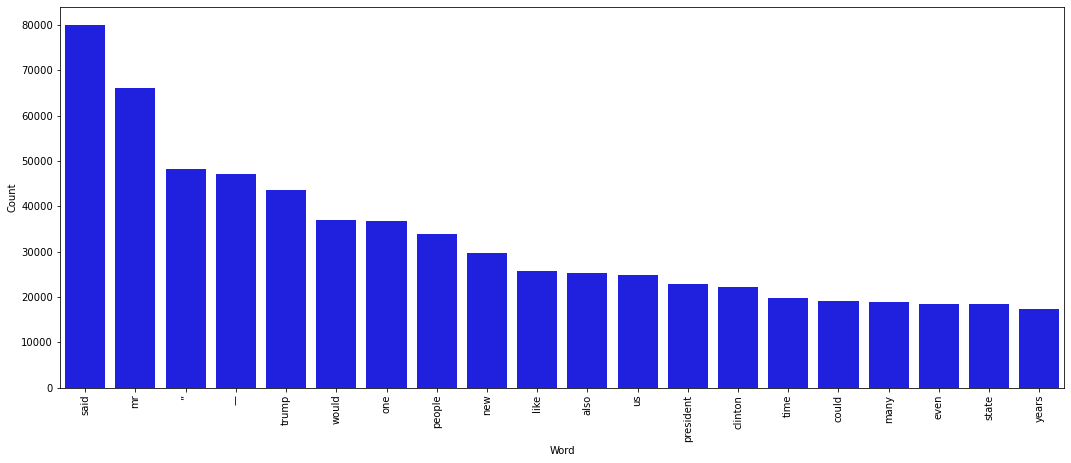

In [27]:
# Most frequent words in news article
counter(data["news"],20)

In [28]:
# initializing string 
data = data
  
# printing original string 
print(data) 
  
# initializing punctuations string  
punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~--'''
  
# Removing punctuations in string 
# Using loop + punctuation string 
for ele in data:  
    if ele in punc:  
        data = data.replace(ele, "")

                                                    news  label
0      washington — sonny perdue’s telling georgians ...      0
1      houston — venezuela plan tactical approach des...      0
2      sunday abc’s “this week” discussing republican...      0
3      augusta — beleaguered republican governor main...      0
4      finian cunningham written extensively internat...      1
...                                                  ...    ...
20795          youll dog licking vomit chinese overlords      1
20796  rixon stewart november 5 2016 rixon stewart — ...      1
20797  posted eddie know dakota access pipeline prote...      1
20798  it’s officially summer society boutique societ...      0
20799  emory university atlanta georgia announced fun...      0

[20761 rows x 2 columns]


# Modelling

In [29]:
from sklearn import metrics
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")

In [30]:
# Split the Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data['news'], data.label, test_size=0.1, random_state=0)

# Logistic Regression

In [31]:
# Vectorizing and applying TF-IDF
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])
# Fitting the model
model = pipe.fit(X_train, y_train)
# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 95.62%


Confusion matrix, without normalization


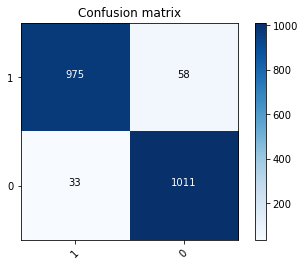

In [32]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['1', '0'])

# Decision TreeClassifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)
# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 90.18%


Confusion matrix, without normalization


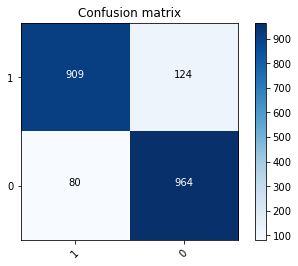

In [34]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['1', '0'])

# Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 92.39%


Confusion matrix, without normalization


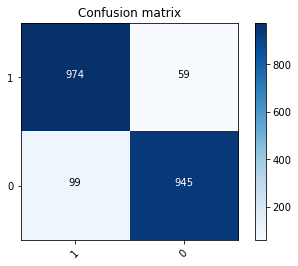

In [36]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['1', '0'])

# MultinomialNB

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [38]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

accuracy:   0.851
Confusion matrix, without normalization


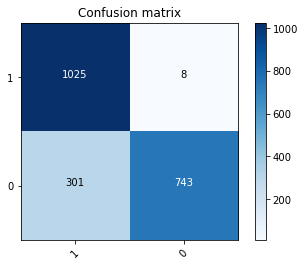

In [39]:
import itertools
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['1', '0'])

# PassiveAggressiveClassifier

In [40]:
from sklearn.metrics import classification_report,f1_score,log_loss
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()

accuracy:   0.974
Confusion matrix, without normalization


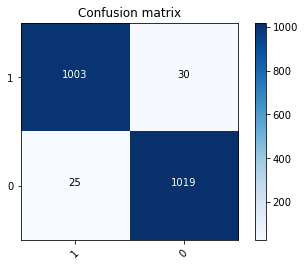

In [41]:
import itertools
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['1', '0'])

In [42]:
clf = MultinomialNB(alpha=0.1)

In [43]:
last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

Alpha: 0.00 Score: 0.93067
Alpha: 0.10 Score: 0.92345
Alpha: 0.20 Score: 0.90997
Alpha: 0.30 Score: 0.89793
Alpha: 0.40 Score: 0.88782
Alpha: 0.50 Score: 0.87915
Alpha: 0.60 Score: 0.87145
Alpha: 0.70 Score: 0.86615
Alpha: 0.80 Score: 0.86086
Alpha: 0.90 Score: 0.85701


In [44]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)

0 -12.5819045804081 000
0 -8.039112731675663 follow
0 -7.4352013361406755 twitter
0 -6.94403937603046 breitbart
0 -6.939811095293326 com
0 -6.791683424894301 said
0 -6.13139555405853 mr
0 -5.772371269418967 ms
0 -5.600001250673451 2017
0 -4.299143971497429 president
0 -3.6081816849758046 sunday
0 -3.489717886741555 administration
0 -3.346687309103025 march
0 -3.266783736373325 saturday
0 -3.2175519543130235 ap
0 -3.1645975033879608 pic
0 -3.123338450926166 milo
0 -3.06904948782529 islamic
0 -2.937745157841727 mrs
0 -2.936609777134892 dr
0 -2.9297584266625956 https
0 -2.8303197136592 tillerson
0 -2.8259311455833953 pamkeynen
0 -2.6759969313723415 pam
0 -2.5648741924757097 executive
0 -2.3949511102119487 thursday
0 -2.3925945425357087 gorsuch
0 -2.3523911520715095 register
0 -2.3432161508484177 macron
0 -2.2793395942149712 spicer

1 7.359496648701535 october
1 6.4852481081546625 november
1 6.013798819138762 2016
1 5.846824035251517 presidentelect
1 5.1290225703996 share
1 5.0941969342565

In [45]:
feature_names = tfidf_vectorizer.get_feature_names()

In [46]:
### Most real
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

[(-6.724792121062017, 'clinton'),
 (-6.803845290849286, 'trump'),
 (-6.99442333597128, 'hillary'),
 (-7.428070864543427, 'people'),
 (-7.439279334448586, 'election'),
 (-7.494385129549148, '2016'),
 (-7.55985645017013, 'fbi'),
 (-7.70073435140079, 'russia'),
 (-7.7124853475960125, 'said'),
 (-7.781337324604362, 'new'),
 (-7.7852663669960736, 'world'),
 (-7.821043085156883, 'like'),
 (-7.821895357236121, 'obama'),
 (-7.8239816365533885, 'war'),
 (-7.87146340262827, 'media'),
 (-7.876452589463874, 'state'),
 (-7.884029964638235, 'campaign'),
 (-7.910358530384194, 'emails'),
 (-7.911334528755147, 'president'),
 (-7.9238699260873515, 'donald')]

In [47]:
### Most fake
sorted(zip(clf.coef_[0], feature_names))[:20]

[(-12.597621523297093, '0001'),
 (-12.597621523297093, '0009'),
 (-12.597621523297093, '000c'),
 (-12.597621523297093, '000s'),
 (-12.597621523297093, '000th'),
 (-12.597621523297093, '0012'),
 (-12.597621523297093, '0024'),
 (-12.597621523297093, '0115'),
 (-12.597621523297093, '0134'),
 (-12.597621523297093, '014'),
 (-12.597621523297093, '019'),
 (-12.597621523297093, '020'),
 (-12.597621523297093, '0200gmt'),
 (-12.597621523297093, '021'),
 (-12.597621523297093, '0230'),
 (-12.597621523297093, '0250'),
 (-12.597621523297093, '030'),
 (-12.597621523297093, '032'),
 (-12.597621523297093, '0345'),
 (-12.597621523297093, '039')]

In [48]:
# save the model to disk
import pickle
filename = 'finalized_model.sav'
pickle.dump(linear_clf, open(filename, 'wb'))